<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/4_real_world_data_analysis_and_preparation/5_handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

# A Comprehensive Guide to Handle Missing Values Effectively

It's not often that we get clean data, real world data is very messy. In fact, missing values are one of the most cases that data scientist and machine learning engineers are likely to deal with day to day, and honestly it takes time to come up with the strategy to remove such missing values effectively. 

Though we have tools that make the technical side easier, we often end up not checking how the filled values or dropped values fit with the existing data and the target goals of the analysis. Not checking this can leave us communicating wrong information, or spending time doing hyperparameter tuning and model selection thinking that the data is fine, so it must be something else, and end up tuning the parameters weeks and weeks. 

Having said that, in this tutorial I will walk through the common ways that data scientists and machine learning engineers use to handle missing values and we will see the best practices as we conclude the post. Let's get dive in! I will use california housing, a classic dataset in Machine learning found [here](https://www.kaggle.com/search?q=California+housing+in%3Adatasets).

In [1]:
#from sklearn.datasets import california_housing
#This loads the california dataset from sklearn.datasets but since it is preprocessed, there are no missing values. 

In [2]:
#I will start importing all required libraries. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrive data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [4]:
housing = download_read_data(data_path)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

It seems that we only have missing values in total_bedrooms. It would be better to have many features missing values fr this experiment, but let's go on. 

Now we know the feature which is missing values, let's do some analysis around it and then go through the techniques to handle the feature, but trying to understand.

## Eploratory Data Analysis

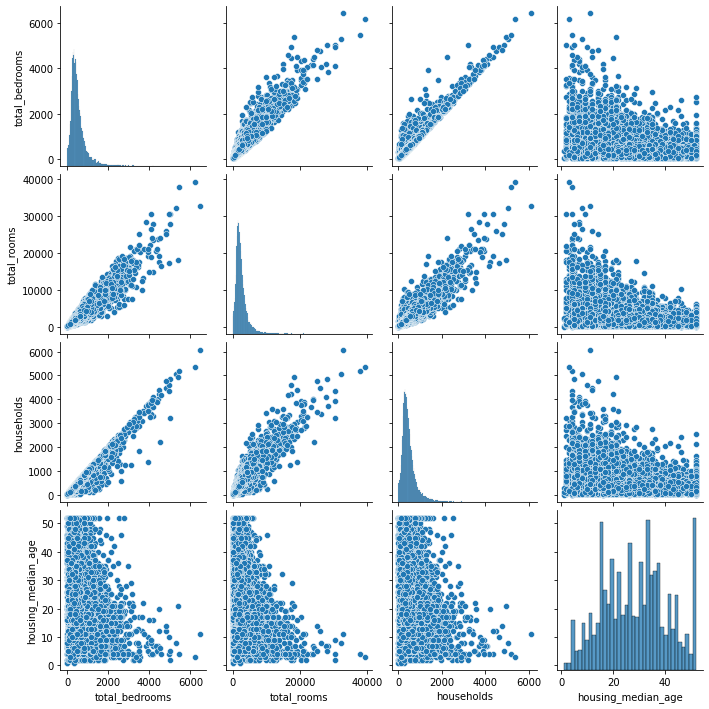

In [6]:
sns.pairplot(housing, vars=['total_bedrooms', 'total_rooms','households','housing_median_age' ])

While our experiment is not about exploratory data analysis at most, you can see that the total bedrooms correlate with total rooms, and that make sense because the bedrooms are counted in total rooms.

Text(0.5, 0, 'Total bedrooms')

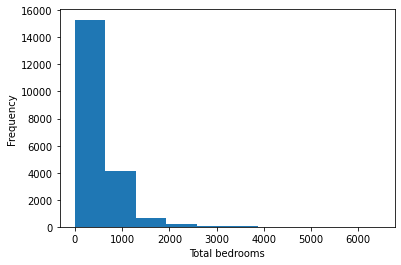

In [7]:
housing['total_bedrooms'].plot(kind='hist')
plt.xlabel('Total bedrooms')

You can see that most houses have bedrooms between 0 to 1000. Very few houses have over 1000 bedrooms. 

In [8]:
print('Recall that the missing values in our dataset are:\n \n{}'.format(housing.isna().sum()))

Recall that the missing values in our dataset are:
 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Handling Missing Values

There are number of methods to handle missing values, but basically, you can do one of these but keep in mind that each can affect our analysis:
    
    *Removing the missing values
    *Filling the missing values
    *Leaving the missing values as it is.
    
    
Starting from the first one, if you were to remove the missing values, fairly simple. You can do the following, and you are done. 

### Removing the missing values

In [9]:
housing_df=housing.copy()

In [10]:
housin_null_dropped=housing.dropna()

In [11]:
housin_null_dropped.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now, you're done. However, you can wish to remove the missing values by a condition. In this case, you can do the following. Say you want to remove the columns that contain missing values. Since we don't have more than 1 of such columns, this will not change our dataset, but that's something you can try at your end. 

In [12]:
housin_null_dropped_2=housing.dropna(axis='columns') 

In [13]:
housin_null_dropped_2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

As you can see, total_bedroom is removed. This is can however led to the loss of data that could be meanigful despite that it contains NaNs. If you wanted more control, then you can use 'threshold' to specify how many non missing values (minimum) to keep for a given column or row. We will not see the effect of this, but you can try that on your end.

In [14]:
housin_null_dropped_2=housing.dropna(axis='columns', thresh=2) 

In [15]:
housin_null_dropped_2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Another Interesting thing here to try is to remove the rows or columns that are empty. This can save you time if you have hundreds of columns or rows that you want to remove specifically. When how is set to 'all', you are basically saying remove all columns which are all null (contain missing values). **All the thing we saw so far involving the axis='columns', can be applied to rows**

In [16]:
housin_null_dropped_3=housing.dropna(axis='columns', how='all') 

### Filling the missing values

With pandas, filling the missing values is quite straight. Here is how you can fill the any missing value with a number. 

In [17]:
housing_filled=housing.fillna(3)

In [18]:
housing_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

You could also use the ffill (forward fill) or backward fill 'bfill', where you fill the values preeceding or following the missing value. 

In [19]:
housing_filled=housing.fillna(method='ffill') #method='bfill' for backward

This is dangerous though. Let's take an example. 

In [20]:
housing_filled.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY


Downside about this is that if the first value would be a missing value, then the rest are same. Also, see what happened at the index 97. The house with total rooms of 335 has a total_bedroom of 1331, which is impossible. All the method introduced above can led to serious bias or wrong results, leading to wrong decisions. Before we wrap how to fill missing values, let's also look at other ways you can use to fill the missing values. Say we want to fill all missing values by mean or median of a given column. 

In this case, we will use sklearn imputer method to handle this.

In [21]:
from sklearn.impute import SimpleImputer
housing_numeric=housing.drop('ocean_proximity', axis=1) #Simple imputer only work with numeric features, so we drop the OCEAN_PROXIMITY

mean_fill=SimpleImputer(missing_values=np.NaN,strategy='mean')

mean_fill.fit(housing_numeric)

SimpleImputer()

In [22]:
mean_filled=mean_fill.transform(housing_numeric)

In [23]:
pd.DataFrame(mean_filled, columns=housing_numeric.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


As you can see, the total_bedroom is filled with mean. Take for example at index 3 and 4. 

But also this brings an issue. You will also find somewhere that the number of bedrooms are greater than the number of rooms in a house and that's again impossible and can lead to wrong analysis.

## The problem is how do you deal with the missing value effectively? Do you remove them? Or what if there would be other ways to handle it?

If you had few missing values, no doubt that it would be good to remove them completely to avoid imputing them with irrelevant values. ""Quality over quantity""

But also you may wish to keep the data and perhaps find a better way to handle the missing values. One of the best way out there (considering all the flaws of the above methods) is to fill the given missing value considering the values of corresponding features. In this case, we will use sklearn method called Iterative Imputer or Regression Imputer. This works on the principle of Linear regression. I will not explain that here, but here is how it is done. 

What you can know is this estimates each feature from all the others. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer()
iter_imputer

IterativeImputer()

In [25]:
housing_imputed=iter_imputer.fit_transform(housing_numeric)

In [26]:
pd.DataFrame(housing_imputed, columns=housing_numeric.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


As you can see, the missing values are filled in accordance to the other features. For instance, a house with total_room of 1467.0, and bedrooms of 190, and 1274 rooms for 200 for bedrooms. Note that for each values to be missing estimated, every corresponding features is considered. 

## There you have it. You now know how to handle the missing values effectively. 

Thanks for reading.